<a href="https://colab.research.google.com/github/prabirdeb/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Online Retail Customer Segmentation**

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **The performance of a machine learning model depends on three factors:**

i. Quality of Data 

(for training and testing)

ii. Quantity of Data 

(more the experiences better will be the learning)

iii. Quality of Model 

(proper model selection and hyperparameter tuning)


# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into a quality data for the ml model 

## **1. Connection with the Data**

Here, we are provided with a dataset of online retail customers.

Thus, the dataset is actually a collection of experiences about online retail customers.  

Now, we need to **decode the set of experiences** to build a model for customer segmentation.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import ast
from datetime import datetime
from datetime import date
import re

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Customer Segmentation-Prabir Debnath/Online Retail.xlsx')

In [4]:
xls.sheet_names

['Online Retail']

In [5]:
# Reading the data as pandas dataframe
customer_df = pd.read_excel(xls, 'Online Retail')

## **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [6]:
customer_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Checking the unique values for categorical columns
for column_name in customer_df.describe(include=['object','category']).columns:
  print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
  print(customer_df[column_name].unique())

Unique values for InvoiceNo:
[536365 536366 536367 ... 581585 581586 581587]
Unique values for StockCode:
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Unique values for Description:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Unique values for Country:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [10]:
# Checking the no. of unique values in each column
print(customer_df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [11]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

###4.1 Creating Dataset with Relavant Features

In [12]:
# Finding out the relavant features from the deeper understanding of the data
relavant_features=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID']

In [13]:
# Creating new df with relavant features
customer_df_clean=customer_df[relavant_features]

###4.2 Treating the missing, null or duplicate values

In [14]:
# Checking is there any duplicate value
len(customer_df_clean[customer_df_clean.duplicated()])

5268

In [15]:
# Removing duplicate values
customer_df_clean.drop_duplicates(subset=None, keep='first', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
len(customer_df_clean[customer_df_clean.duplicated()])

0

In [17]:
# checking the no. of null values in each column
print(customer_df_clean.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
dtype: int64


In [18]:
# Dropping null values as we cannot impute the customer ID
customer_df_clean.dropna(inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
print(customer_df_clean.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64


In [20]:
# There are negative values in quantity column. Removing the rows with negative values in quantity
customer_df_clean=customer_df_clean[(customer_df_clean.Quantity>0)]

In [21]:
customer_df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
# There are zero values in unit price column. Removing the rows with zero values in unit price
customer_df_clean=customer_df_clean[(customer_df_clean.UnitPrice>0)]

In [23]:
customer_df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [24]:
customer_df_clean.reset_index(inplace=True)
customer_df_clean.drop('index', axis = 1, inplace=True)

In [25]:
# Checking is there any experience with cancelled order
customer_df_clean['InvoiceNo'] = customer_df_clean['InvoiceNo'].astype('str')
np.unique(customer_df_clean['InvoiceNo'].str.contains('C'))

array([False])

In [26]:
# There is no experience in our clean dataset with cancelled order

In [27]:
customer_df_clean.shape

(392692, 7)

In [28]:
customer_df_clean.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0


###4.3 Evaluation of Python Literals

In [29]:
# There is no python literal as string in the dataset

###4.4 Feature Engineering

Here each row of the dataset is not representing experience regarding each individual customer. Now we need to create an experience set where each row tells us about one customer

What they buy?

How much they buy?

When they buy?

How they buy? (Frequency)

In [30]:
customer_df_clean.groupby('Description')['UnitPrice'].unique()

Description
 4 PURPLE FLOCK DINNER CANDLES            [2.55, 0.79]
 50'S CHRISTMAS GIFT BAG LARGE            [1.25, 1.04]
 DOLLY GIRL BEAKER                        [1.25, 1.08]
 I LOVE LONDON MINI BACKPACK              [4.15, 3.75]
 I LOVE LONDON MINI RUCKSACK                    [4.15]
                                           ...        
ZINC T-LIGHT HOLDER STARS SMALL     [0.72, 0.83, 1.63]
ZINC TOP  2 DOOR WOODEN SHELF                  [16.95]
ZINC WILLIE WINKIE  CANDLE STICK    [0.85, 0.72, 1.63]
ZINC WIRE KITCHEN ORGANISER               [10.4, 3.95]
ZINC WIRE SWEETHEART LETTER TRAY    [3.75, 3.29, 1.25]
Name: UnitPrice, Length: 3877, dtype: object

From the average unit price, we can understand what they buy.

From the sum of quantity , we can understand how much they buy.

From the combination of average unit price and average quantity, we can understand the "Monetary" impact on the company

As the dataset is only for 10 months, we can consider all experiences as recent (Recency)

In [31]:
customer_df_clean=customer_df_clean.groupby('CustomerID').agg({'UnitPrice':'mean', 'Quantity':'sum'}).reset_index()

In [32]:
customer_df_clean.rename(columns={'UnitPrice': 'Mean_UnitPrice', 
                         'Quantity': 'Sum_Quantity'}, inplace=True)

The segments of customers may be

Target-1: Buying costly product high quantity

Target-2: Buying less costly product high quantity

Target-3: Buying costly products less quantity

Target-4: Buying less costly product less quantity

In [33]:
customer_df_clean.head(2)

,CustomerID,Mean_UnitPrice,Sum_Quantity
0,12346.0,1.040000,74215
1,12347.0,2.644011,2458


###4.5 Encoding of Categorical Features

In [34]:
# No categorical column to encode

## **5. Treating Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the true **outliers** or **exceptional or abnormal experiences** and keep them aside.

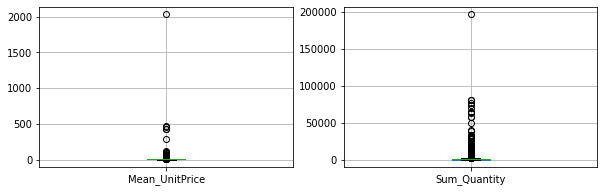

In [35]:
# Checking outliers
fig = plt.figure(figsize=(10, 10))
a=1
for col in customer_df_clean.describe().columns[1:]:
  plt.subplot(3,2, a)
  ax = fig.gca()
  customer_df_clean.boxplot(column = col, ax = ax)
  ax.set_title('');
  a=a+1
plt.show()

In [36]:
len(customer_df_clean[customer_df_clean['Mean_UnitPrice'] > 250])

6

In [37]:
# There are clear outliers above Mean_UnitPrice> 250 . Thus we can remove these experiences
customer_df_clean=customer_df_clean[customer_df_clean['Mean_UnitPrice'] < 250]

In [38]:
len(customer_df_clean[customer_df_clean['Sum_Quantity'] > 50000])

12

In [39]:
# There are clear outliers above Quantity> 10000 . Thus we can remove these experiences
customer_df_clean=customer_df_clean[customer_df_clean['Sum_Quantity'] < 50000]

In [40]:
customer_df_clean.shape

(4320, 3)

## **6. Final Feature Selection from the Data**

Now we need to understand the distribution of the features and the relationship among the features for the decision of transformation, scaling and final selection of features.

###6.1 Overall Feature Understanding

<Figure size 720x720 with 0 Axes>

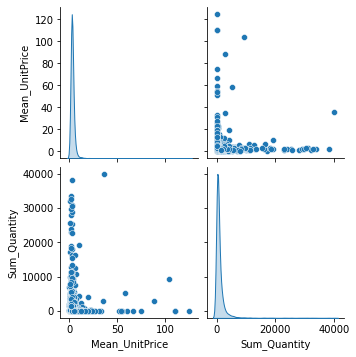

In [41]:
# Univariate, bivariate and multivariate analysis in a single plot
plt.figure(figsize=(10,10))
sns.pairplot(data=customer_df_clean.iloc[:,1:], kind='scatter', diag_kind='kde')
plt.show()

###6.2 Looking for Normal Distribution of Features

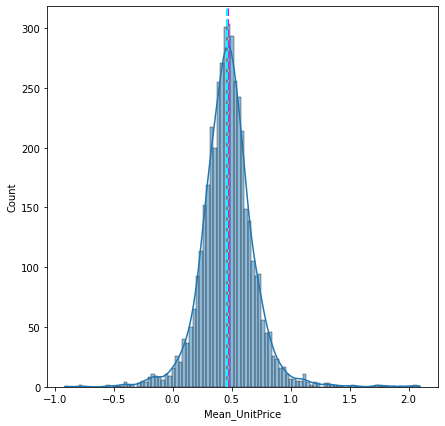

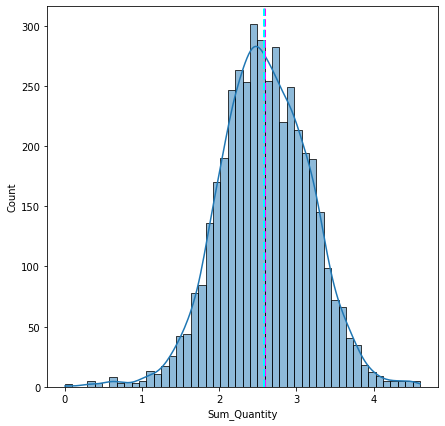

In [42]:
# We can see the 'Mean_UnitPrice' and 'Sum_Quantity' both are extreamly positively skewed. Thus need log transformation
# Checking distribution of 'comments' and 'duration' after log transformation
for col in customer_df_clean.describe().columns[1:]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = np.log10(customer_df_clean[col])
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

###6.3 Looking for Truly Independent Features

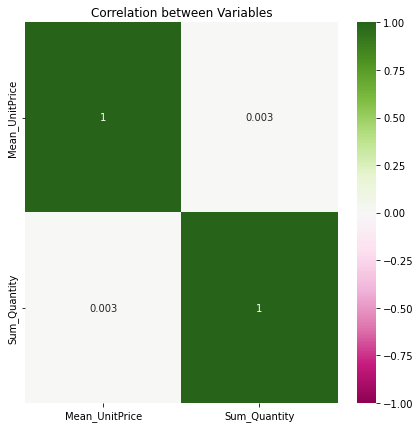

In [43]:
# Checking multicolinearity
plt.figure(figsize=(7,7))
sns.heatmap(customer_df_clean.iloc[:,1:].corr(), vmin=-1, cmap='PiYG', annot=True)
plt.title('Correlation between Variables')
plt.show()

In [44]:
# Creating function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
calc_vif(customer_df_clean[[i for i in customer_df_clean.describe().columns if i not in ['CustomerID']]])

,variables,VIF
0,Mean_UnitPrice,1.058642
1,Sum_Quantity,1.058642


In [46]:
# All the VIF are below 10
# Thus there is no problem of multicolinearity and no need to remove any feature

## **7. Preparation of Input Data**

###7.1 Normalization

In [47]:
# Creating normalized input dataset
X = np.log10(customer_df_clean[customer_df_clean.describe().columns[1:]])

In [48]:
# Checking is there any infinite values after normalization
X.describe()

,Mean_UnitPrice,Sum_Quantity
count,4320.000000,4320.000000
mean,0.467757,2.590160
std,0.229612,0.585342
min,-0.911864,0.000000
25%,0.343650,2.201397
50%,0.464978,2.575188
75%,0.582282,2.992554
max,2.096910,4.603231


In [49]:
# Imputation of infinite values with zero
for col in X.columns:
  X[col].replace([np.inf, -np.inf], 0, inplace=True)

In [50]:
X.describe()

,Mean_UnitPrice,Sum_Quantity
count,4320.000000,4320.000000
mean,0.467757,2.590160
std,0.229612,0.585342
min,-0.911864,0.000000
25%,0.343650,2.201397
50%,0.464978,2.575188
75%,0.582282,2.992554
max,2.096910,4.603231


###7.2 Scaling

In [51]:
# Standardization of Input Data
scaler = StandardScaler()
X_final = scaler.fit_transform(X)

In [52]:
X_final.shape

(4320, 2)

# **Building of Model-1**

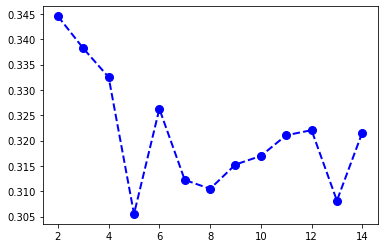

In [53]:
# Hyperparameter tuning through silhouette score
list_of_silhouette_score=[]
for k in range(2,15):
  model = KMeans(n_clusters=k)
  y_preds = model.fit_predict(X_final)
  score=silhouette_score(X_final, y_preds,  metric='euclidean')
  list_of_silhouette_score.append(score)

plt.plot(range(2,15), list_of_silhouette_score,'bo--',linewidth=2, markersize=8)

In [54]:
# The best clusters= 3 according to silhouette score

In [55]:
model_kmeans = KMeans(n_clusters=3, random_state=0)

In [56]:
y_preds_kmeans= model_kmeans.fit_predict(X_final)
kmeans_clusters_list=np.unique(y_preds_kmeans)
kmeans_clusters_list

array([0, 1, 2], dtype=int32)

In [57]:
customer_df_clean['Kmeans_Cluster']= y_preds_kmeans

# **Building of Model-2**

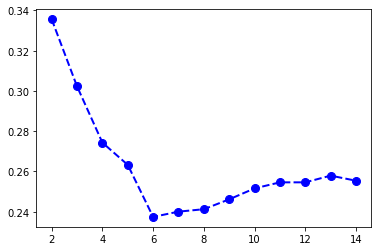

In [58]:
# Hyperparameter tuning through silhouette score
list_of_silhouette_score=[]
for k in range(2,15):
  model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
  y_preds = model.fit_predict(X_final)
  score=silhouette_score(X_final, y_preds,  metric='euclidean')
  list_of_silhouette_score.append(score)

plt.plot(range(2,15), list_of_silhouette_score,'bo--',linewidth=2, markersize=8)

In [59]:
# The best clusters= 3 according to silhouette score

In [60]:
model_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [61]:
y_preds_hc= model_hc.fit_predict(X_final)
hc_clusters_list= np.unique(y_preds_hc)
hc_clusters_list

array([0, 1, 2])

In [62]:
customer_df_clean['hc_Cluster']= y_preds_hc

# **Building of Model-3**

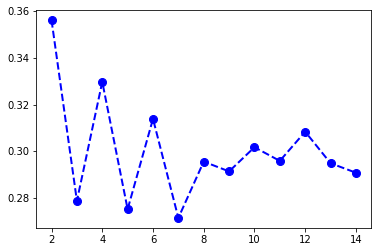

In [63]:
# Hyperparameter tuning through silhouette score
list_of_silhouette_score=[]
for k in range(2,15):
  model = GaussianMixture(n_components= k)
  y_preds = model.fit_predict(X_final)
  score=silhouette_score(X_final, y_preds,  metric='euclidean')
  list_of_silhouette_score.append(score)

plt.plot(range(2,15), list_of_silhouette_score,'bo--',linewidth=2, markersize=8)

In [64]:
# The best clusters= 4 according to silhouette score, But we are selecting 3 for comparison

In [65]:
model_gaussian = GaussianMixture(n_components=3, random_state=0)

In [66]:
y_preds_gaussian= model_gaussian.fit_predict(X_final)
gaussian_clusters_list= np.unique(y_preds_gaussian)
gaussian_clusters_list

array([0, 1, 2])

In [67]:
customer_df_clean['Gaussian_Cluster']= y_preds_gaussian

# **Conclusion**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


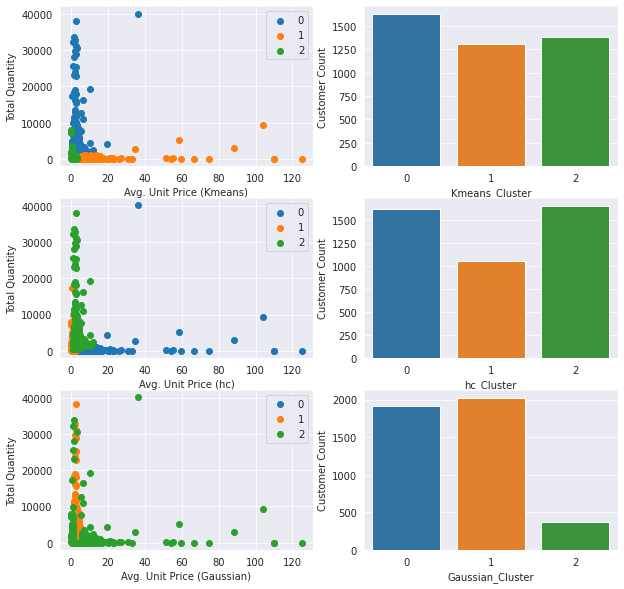

In [68]:
# Performance Comparison of Models
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")

plt.subplot(3,2, 1)
for k in kmeans_clusters_list:
  x=customer_df_clean[customer_df_clean.Kmeans_Cluster==k].Mean_UnitPrice
  y=customer_df_clean[customer_df_clean.Kmeans_Cluster==k].Sum_Quantity
  plt.scatter(x, y)
plt.xlabel('Avg. Unit Price (Kmeans)')
plt.ylabel('Total Quantity')
plt.legend(kmeans_clusters_list)

plt.subplot(3,2, 2)
sns.countplot(customer_df_clean.Kmeans_Cluster)
plt.ylabel('Customer Count')

plt.subplot(3,2, 3)
for k in hc_clusters_list:
  x=customer_df_clean[customer_df_clean.hc_Cluster==k].Mean_UnitPrice
  y=customer_df_clean[customer_df_clean.hc_Cluster==k].Sum_Quantity
  plt.scatter(x, y)
plt.xlabel('Avg. Unit Price (hc)')
plt.ylabel('Total Quantity')
plt.legend(hc_clusters_list)

plt.subplot(3,2, 4)
sns.countplot(customer_df_clean.hc_Cluster)
plt.ylabel('Customer Count')

plt.subplot(3,2, 5)
for k in gaussian_clusters_list:
  x=customer_df_clean[customer_df_clean.Gaussian_Cluster==k].Mean_UnitPrice
  y=customer_df_clean[customer_df_clean.Gaussian_Cluster==k].Sum_Quantity
  plt.scatter(x, y)
plt.xlabel('Avg. Unit Price (Gaussian)')
plt.ylabel('Total Quantity')
plt.legend(gaussian_clusters_list)

plt.subplot(3,2, 6)
sns.countplot(customer_df_clean.Gaussian_Cluster)
plt.ylabel('Customer Count')

plt.show()

For online retail customer segmentation, on the basis of above comparative study, we are selecting KMeans model as it performing better clustering with minimum overlap among all three models